# Final Project_PC 

## Import library

In [1]:
import pandas as pd
import numpy as np
from numpy import *
from numpy.linalg import inv, multi_dot
import matplotlib.pyplot as plt
from seaborn import heatmap
import yfinance as yf
import cvxpy as cp
from sklearn.linear_model import LinearRegression

In [2]:
asset_symbols = ['VUG','VTV','SPHQ','SPHD','VHT','IYW','SCHX','SCHA','MTUM','EPS','MCHI','ECNS','FXI','KWEB','CHIR','CQQQ','PGJ','SCHO','TLT','CBON','IEO','IAU','DBA','VNQ','VIXY']
numofasset = len(asset_symbols)
numofportfolio = 5000

In [3]:
data = yf.download(asset_symbols, start="2021-01-01", end="2023-12-31")["Adj Close"]
data

[*********************100%%**********************]  25 of 25 completed


,CBON,CHIR,CQQQ,DBA,ECNS,EPS,FXI,IAU,IEO,IYW,...,SCHO,SCHX,SPHD,SPHQ,TLT,VHT,VIXY,VNQ,VTV,VUG
Date,,,,,,,,,,,,,,,,,,,,,
2021-01-04,22.385866,40.742649,82.585106,15.330893,43.823479,37.695938,43.141300,37.099998,32.500584,82.761574,...,48.638527,42.955570,32.925514,39.840996,146.488831,213.755463,301.000000,73.742661,108.974991,245.120895
2021-01-05,22.353634,41.005466,84.294441,15.416540,43.999660,37.933788,44.315346,37.180000,34.355942,83.432999,...,48.629066,43.252129,33.201023,40.137745,145.400925,215.071136,289.600006,73.850349,109.791557,246.711426
2021-01-06,22.284575,41.122276,83.340401,15.349924,44.669121,38.333397,43.802864,36.599998,35.378654,81.863075,...,48.610134,43.515224,34.258533,40.281338,142.416092,218.480377,287.799988,73.975990,112.436119,244.011398
2021-01-07,22.197088,41.148823,84.224876,15.340409,45.039085,38.828144,44.110348,36.480000,36.356121,84.292023,...,48.610134,44.194477,34.151901,40.874832,141.160782,221.908875,270.200012,73.832390,113.271263,249.647079
2021-01-08,22.174067,41.281559,87.961586,15.359441,45.858303,38.932804,45.023487,35.259998,35.939796,84.894325,...,48.600674,44.443214,34.116344,41.037563,140.705200,222.821198,267.600006,74.550339,113.354790,252.317596
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-22,21.919172,13.439922,34.630001,20.889999,24.639999,50.009998,23.049999,38.860001,94.339996,122.599998,...,48.380001,56.230000,42.220001,53.990002,98.480003,248.380005,16.580000,87.709999,148.509995,310.579987
2023-12-26,21.993999,13.406602,34.599998,20.980000,24.610001,50.220001,23.219999,39.139999,95.650002,123.250000,...,48.369999,56.480000,42.450001,54.220001,98.760002,249.240005,16.129999,88.360001,149.300003,311.690002
2023-12-27,21.990000,13.289001,34.500000,21.000000,24.690001,50.240002,23.250000,39.340000,95.169998,123.250000,...,48.430000,56.570000,42.459999,54.209999,100.510002,250.479996,15.480000,88.790001,149.589996,312.040009


In [4]:
data2=yf.download('SPY ^IRX', start="2021-01-01", end="2023-12-31")["Adj Close"]

data2

[*********************100%%**********************]  2 of 2 completed


,SPY,^IRX
Date,,
2021-01-04,352.767242,0.068
2021-01-05,355.196716,0.078
2021-01-06,357.320343,0.078
2021-01-07,362.629211,0.080
2021-01-08,364.695374,0.080
...,...,...
2023-12-22,473.649994,5.208
2023-12-26,475.649994,5.203
2023-12-27,476.510010,5.235


In [5]:
data.to_csv('data.csv')
data2.to_csv('data2.csv')

In [6]:
asset_symbols_total = ['SPY','VUG','VTV','SPHQ','SPHD','VHT','IYW','SCHX','SCHA','MTUM','EPS','MCHI','ECNS','FXI','KWEB','CHIR','CQQQ','PGJ','SCHO','TLT','CBON','IEO','IAU','DBA','VNQ','VIXY']
data3=yf.download(asset_symbols_total, start="2021-01-01", end="2023-12-31")["Adj Close"]

data3

[*********************100%%**********************]  26 of 26 completed


,CBON,CHIR,CQQQ,DBA,ECNS,EPS,FXI,IAU,IEO,IYW,...,SCHX,SPHD,SPHQ,SPY,TLT,VHT,VIXY,VNQ,VTV,VUG
Date,,,,,,,,,,,,,,,,,,,,,
2021-01-04,22.385866,40.742649,82.585106,15.330893,43.823479,37.695938,43.141300,37.099998,32.500584,82.761574,...,42.955570,32.925514,39.840996,352.767242,146.488831,213.755463,301.000000,73.742661,108.974991,245.120895
2021-01-05,22.353634,41.005466,84.294441,15.416540,43.999660,37.933788,44.315346,37.180000,34.355942,83.432999,...,43.252129,33.201023,40.137745,355.196716,145.400925,215.071136,289.600006,73.850349,109.791557,246.711426
2021-01-06,22.284575,41.122276,83.340401,15.349924,44.669121,38.333397,43.802864,36.599998,35.378654,81.863075,...,43.515224,34.258533,40.281338,357.320343,142.416092,218.480377,287.799988,73.975990,112.436119,244.011398
2021-01-07,22.197088,41.148823,84.224876,15.340409,45.039085,38.828144,44.110348,36.480000,36.356121,84.292023,...,44.194477,34.151901,40.874832,362.629211,141.160782,221.908875,270.200012,73.832390,113.271263,249.647079
2021-01-08,22.174067,41.281559,87.961586,15.359441,45.858303,38.932804,45.023487,35.259998,35.939796,84.894325,...,44.443214,34.116344,41.037563,364.695374,140.705200,222.821198,267.600006,74.550339,113.354790,252.317596
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-22,21.919172,13.439922,34.630001,20.889999,24.639999,50.009998,23.049999,38.860001,94.339996,122.599998,...,56.230000,42.220001,53.990002,473.649994,98.480003,248.380005,16.580000,87.709999,148.509995,310.579987
2023-12-26,21.993999,13.406602,34.599998,20.980000,24.610001,50.220001,23.219999,39.139999,95.650002,123.250000,...,56.480000,42.450001,54.220001,475.649994,98.760002,249.240005,16.129999,88.360001,149.300003,311.690002
2023-12-27,21.990000,13.289001,34.500000,21.000000,24.690001,50.240002,23.250000,39.340000,95.169998,123.250000,...,56.570000,42.459999,54.209999,476.510010,100.510002,250.479996,15.480000,88.790001,149.589996,312.040009


In [7]:
data3.to_csv('data3.csv')

## Descriptive Statistics

In [8]:
summary = data.describe().T
print(summary)
summary_bm = data2.describe().T
print(summary_bm)

      count        mean        std         min         25%         50%  \
CBON  753.0   22.224314   0.729854   20.507000   21.677324   22.172417   
CHIR  753.0   27.065884   9.790802   13.155718   19.133823   24.268414   
CQQQ  753.0   54.539110  18.165754   30.827799   40.349461   46.510021   
DBA   753.0   19.151461   1.518656   15.245245   18.290487   19.183060   
ECNS  753.0   37.398467   8.663334   24.299999   29.597698   35.329769   
EPS   753.0   44.026618   2.796661   37.649864   41.994453   44.043587   
FXI   753.0   32.390296   7.106563   19.891132   26.907719   29.860435   
IAU   753.0   35.089509   1.805845   30.820000   33.840000   34.840000   
IEO   753.0   73.143614  19.278599   32.500584   54.118584   79.352219   
IYW   753.0   95.386410  12.429266   70.271111   85.433052   93.775162   
KWEB  753.0   38.641328  17.260561   18.098618   27.201998   30.180748   
MCHI  753.0   55.185931  13.700858   33.893887   44.601433   49.570782   
MTUM  753.0  151.737147  14.419757  12

## Visualize Data

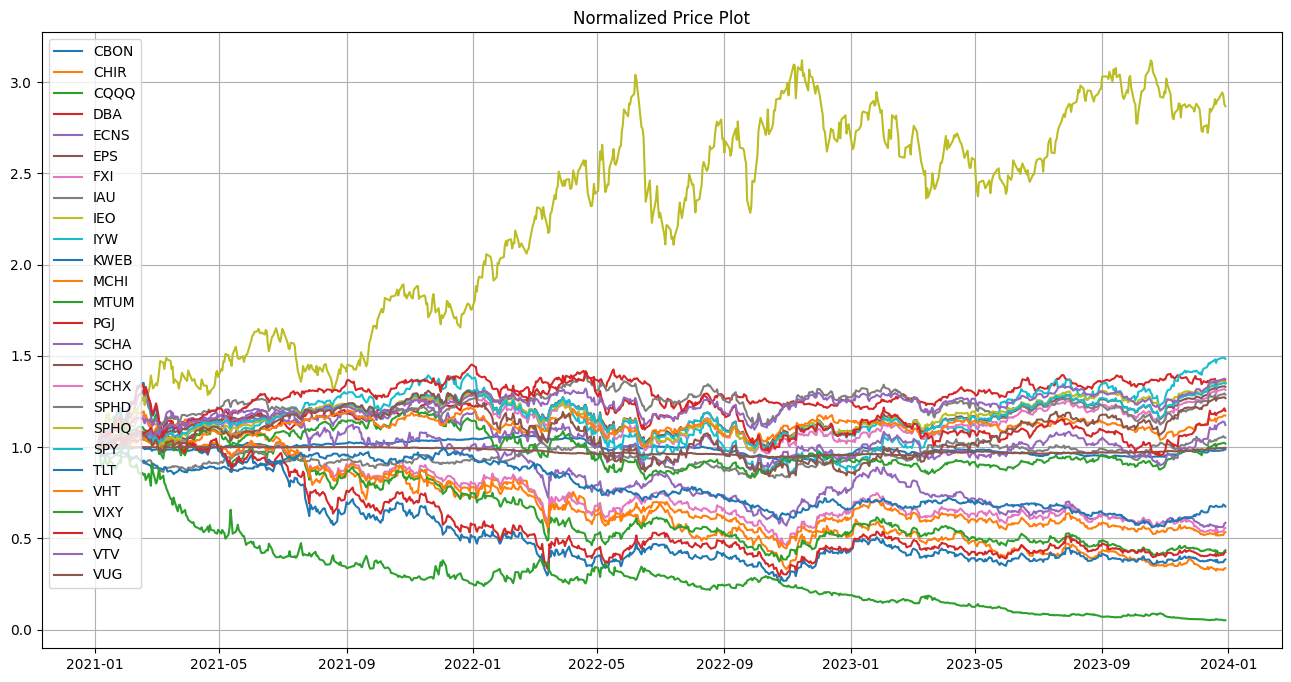

In [9]:
# Visualize the data
fig = plt.figure(figsize=(16,8))
ax = plt.axes()

ax.set_title('Normalized Price Plot')
ax.plot(data3[-753:]/data3.iloc[-753] * 1)
ax.legend(data3.columns, loc='upper left')
ax.grid(True)

## Calculate Returns

In [10]:
# Calculate returns 
returns = data.pct_change().fillna(0)
returns.head()

,CBON,CHIR,CQQQ,DBA,ECNS,EPS,FXI,IAU,IEO,IYW,...,SCHO,SCHX,SPHD,SPHQ,TLT,VHT,VIXY,VNQ,VTV,VUG
Date,,,,,,,,,,,,,,,,,,,,,
2021-01-04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2021-01-05,-0.001440,0.006451,0.020698,0.005587,0.004020,0.006310,0.027214,0.002156,0.057087,0.008113,...,-0.000195,0.006904,0.008368,0.007448,-0.007427,0.006155,-0.037874,0.001460,0.007493,0.006489
2021-01-06,-0.003089,0.002849,-0.011318,-0.004321,0.015215,0.010534,-0.011564,-0.015600,0.029768,-0.018817,...,-0.000389,0.006083,0.031852,0.003578,-0.020528,0.015852,-0.006216,0.001701,0.024087,-0.010944
2021-01-07,-0.003926,0.000646,0.010613,-0.000620,0.008282,0.012906,0.007020,-0.003279,0.027629,0.029671,...,0.000000,0.015610,-0.003113,0.014734,-0.008814,0.015692,-0.061153,-0.001941,0.007428,0.023096
2021-01-08,-0.001037,0.003226,0.044366,0.001241,0.018189,0.002695,0.020701,-0.033443,-0.011451,0.007145,...,-0.000195,0.005628,-0.001041,0.003981,-0.003227,0.004111,-0.009623,0.009724,0.000737,0.010697


In [11]:
returns_bm = data2.pct_change().fillna(0)
returns_bm.head()

,SPY,^IRX
Date,,
2021-01-04,0.000000,0.000000
2021-01-05,0.006887,0.147059
2021-01-06,0.005979,0.000000
2021-01-07,0.014857,0.025641
2021-01-08,0.005698,0.000000


### Log Returns

In [12]:

log_returns = np.log(data) - np.log(data.shift(1))
log_returns.fillna(0)


,CBON,CHIR,CQQQ,DBA,ECNS,EPS,FXI,IAU,IEO,IYW,...,SCHO,SCHX,SPHD,SPHQ,TLT,VHT,VIXY,VNQ,VTV,VUG
Date,,,,,,,,,,,,,,,,,,,,,
2021-01-04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2021-01-05,-0.001441,0.006430,0.020487,0.005571,0.004012,0.006290,0.026850,0.002154,0.055517,0.008080,...,-0.000195,0.006880,0.008333,0.007421,-0.007454,0.006136,-0.038610,0.001459,0.007465,0.006468
2021-01-06,-0.003094,0.002845,-0.011382,-0.004330,0.015101,0.010479,-0.011632,-0.015723,0.029334,-0.018996,...,-0.000389,0.006064,0.031355,0.003571,-0.020742,0.015727,-0.006235,0.001700,0.023802,-0.011004
2021-01-07,-0.003934,0.000645,0.010557,-0.000620,0.008248,0.012824,0.006995,-0.003284,0.027254,0.029239,...,0.000000,0.015489,-0.003117,0.014626,-0.008853,0.015571,-0.063103,-0.001943,0.007400,0.022833
2021-01-08,-0.001038,0.003221,0.043410,0.001240,0.018026,0.002692,0.020490,-0.034015,-0.011517,0.007120,...,-0.000195,0.005612,-0.001042,0.003973,-0.003233,0.004103,-0.009669,0.009677,0.000737,0.010640
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-22,-0.001819,-0.012608,-0.032669,0.004798,-0.008889,0.002002,-0.028231,0.004643,0.001485,0.001306,...,0.000207,0.001958,0.004986,0.000927,-0.004559,0.006908,-0.023250,0.003884,0.003845,-0.000097
2023-12-26,0.003408,-0.002482,-0.000867,0.004299,-0.001218,0.004190,0.007348,0.007179,0.013790,0.005288,...,-0.000207,0.004436,0.005433,0.004251,0.002839,0.003456,-0.027516,0.007383,0.005305,0.003568
2023-12-27,-0.000182,-0.008811,-0.002894,0.000953,0.003245,0.000398,0.001291,0.005097,-0.005031,0.000000,...,0.001240,0.001592,0.000236,-0.000184,0.017565,0.004963,-0.041132,0.004855,0.001940,0.001122


In [13]:
log_returns_bm = np.log(data2) - np.log(data2.shift(1))
log_returns_bm.fillna(0)

,SPY,^IRX
Date,,
2021-01-04,0.000000,0.000000
2021-01-05,0.006863,0.137201
2021-01-06,0.005961,0.000000
2021-01-07,0.014748,0.025318
2021-01-08,0.005682,0.000000
...,...,...
2023-12-22,0.002008,-0.000384
2023-12-26,0.004214,-0.000961
2023-12-27,0.001806,0.006131


## Annualized Returns

In [14]:
# Calculate annual returns
annual_returns = (returns.mean() * 252)
annual_returns

CBON   -0.002786
CHIR   -0.268983
CQQQ   -0.201775
DBA     0.110689
ECNS   -0.135532
EPS     0.109313
FXI    -0.141219
IAU     0.026889
IEO     0.413054
IYW     0.166998
KWEB   -0.172463
MCHI   -0.157723
MTUM    0.027125
PGJ    -0.158880
SCHA    0.064884
SCHO   -0.001081
SCHX    0.107229
SPHD    0.096225
SPHQ    0.117605
TLT    -0.115759
VHT     0.064782
VIXY   -0.768757
VNQ     0.080969
VTV     0.116644
VUG     0.106828
dtype: float64

In [15]:
annual_returns_bm = (returns_bm.mean() * 252)
annual_returns_bm

SPY     0.115257
^IRX    4.862025
dtype: float64

In [16]:
average_rf = data2['^IRX'].mean()/100
average_rf

0.023518871237433566

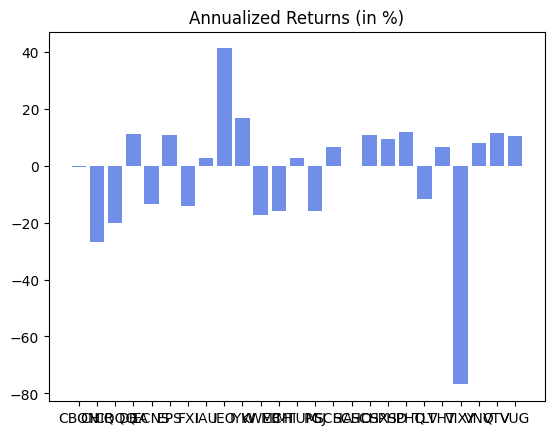

In [17]:
# Visualize the data
fig = plt.figure()
ax =plt.axes()

ax.bar(annual_returns.index, annual_returns*100, color='royalblue', alpha=0.75)
ax.set_title('Annualized Returns (in %)');

## Calculate cumulative return

In [18]:
cumulative_return = (1 + returns).cumprod() - 1
cumulative_return.iloc[-1]

CBON   -0.012770
CHIR   -0.663424
CQQQ   -0.564691
DBA     0.352824
ECNS   -0.414697
EPS     0.329586
FXI    -0.442993
IAU     0.052022
IEO     1.867333
IYW     0.483176
KWEB   -0.615322
MCHI   -0.465595
MTUM    0.018967
PGJ    -0.575253
SCHA    0.121687
SCHO   -0.003876
SCHX    0.312985
SPHD    0.288059
SPHQ    0.357396
TLT    -0.325000
VHT     0.172836
VIXY   -0.948472
VNQ     0.198221
VTV     0.371874
VUG     0.268272
Name: 2023-12-29 00:00:00, dtype: float64

In [19]:
cumulative_return_bm = (1 + returns_bm).cumprod() - 1
cumulative_return_bm.iloc[-1]

SPY      0.347376
^IRX    75.176464
Name: 2023-12-29 00:00:00, dtype: float64

## Calculate Volatility

In [20]:
vols = returns.std()
vols

CBON    0.003471
CHIR    0.027684
CQQQ    0.024893
DBA     0.008702
ECNS    0.018712
EPS     0.010529
FXI     0.020996
IAU     0.008876
IEO     0.021864
IYW     0.016693
KWEB    0.034797
MCHI    0.020471
MTUM    0.012856
PGJ     0.032204
SCHA    0.014501
SCHO    0.001318
SCHX    0.011300
SPHD    0.009558
SPHQ    0.011031
TLT     0.011188
VHT     0.009523
VIXY    0.042555
VNQ     0.012753
VTV     0.009266
VUG     0.014720
dtype: float64

In [21]:
vols_bm = returns_bm.std()
vols_bm

SPY     0.011078
^IRX    0.192891
dtype: float64

## Annualized Volatilities

In [22]:
# Calculate annualized volatilities
annual_vols = vols*sqrt(252)
annual_vols

CBON    0.055096
CHIR    0.439468
CQQQ    0.395171
DBA     0.138133
ECNS    0.297050
EPS     0.167137
FXI     0.333302
IAU     0.140901
IEO     0.347083
IYW     0.264986
KWEB    0.552384
MCHI    0.324971
MTUM    0.204075
PGJ     0.511224
SCHA    0.230201
SCHO    0.020925
SCHX    0.179387
SPHD    0.151731
SPHQ    0.175106
TLT     0.177610
VHT     0.151167
VIXY    0.675532
VNQ     0.202442
VTV     0.147089
VUG     0.233675
dtype: float64

In [23]:
annual_vols_bm = vols_bm*sqrt(252)
annual_vols_bm

SPY     0.175851
^IRX    3.062050
dtype: float64

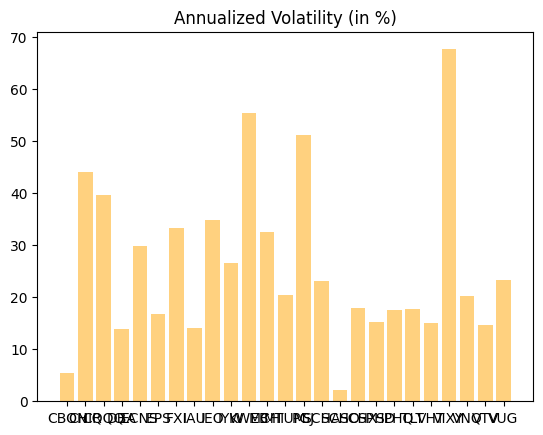

In [24]:
# Visualize the data
fig = plt.figure()
ax = plt.axes()

ax.bar(annual_vols.index, annual_vols*100, color='orange', alpha=0.5)
ax.set_title('Annualized Volatility (in %)');

## Factor analysis

Method1:linear Regression

In [25]:
window_size = 30  # 滚动窗口大小
rolling_beta = []
changing_alpha = []

for i in range(len(log_returns) - window_size + 1):
    factor_window_data = log_returns.iloc[i:i+window_size].copy()
    benchmark_window_data = log_returns_bm.iloc[i:i+window_size].copy()
    factor_window_data.dropna(inplace=True)
    benchmark_window_data.dropna(inplace=True)

    
    X = factor_window_data[['VUG']]
    y = benchmark_window_data['SPY']

    model = LinearRegression().fit(X, y)
    
    rolling_beta.append(model.coef_)
    changing_alpha.append(model.intercept_)

rolling_beta = pd.DataFrame(rolling_beta, columns=['VUG'], index=log_returns.index[window_size-1:])
changing_alpha = pd.Series(changing_alpha, index=log_returns.index[window_size-1:])

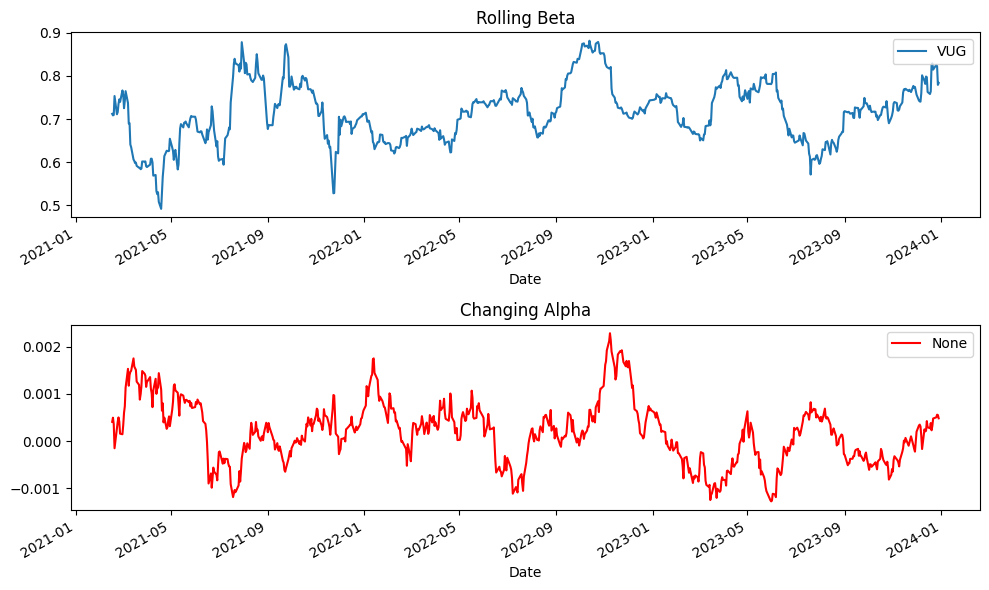

In [26]:
plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)
rolling_beta.plot(title='Rolling Beta', ax=plt.gca())
plt.legend(loc='upper right')

plt.subplot(2, 1, 2)
changing_alpha.plot(title='Changing Alpha', color='r')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

Method2 normal

In [27]:
returns_alphabeta = data3.pct_change()
def calculate_rolling_beta(asset_returns, market_returns, window):
    return asset_returns.rolling(window=window).cov(market_returns) / market_returns.rolling(window=window).var()

rolling_betas = returns_alphabeta.apply(lambda x: calculate_rolling_beta(x, returns_alphabeta['SPY'], window_size))


market_excess_return = returns_alphabeta['SPY'] 
#average_rf
def calculate_changing_alpha(asset_returns, market_excess_return, beta, window):
    alpha = asset_returns.rolling(window=window).mean() - beta * market_excess_return.rolling(window=window).mean()
    return alpha

changing_alphas = returns_alphabeta.apply(lambda x: calculate_changing_alpha(x, market_excess_return, rolling_betas[x.name], window_size))

rolling_betas['VUG'].dropna().tail(), changing_alphas['VUG'].dropna().tail()

(Date
 2023-12-22    1.059907
 2023-12-26    1.019803
 2023-12-27    1.022546
 2023-12-28    1.015694
 2023-12-29    1.022625
 Name: VUG, dtype: float64,
 Date
 2023-12-22   -0.000070
 2023-12-26   -0.000092
 2023-12-27   -0.000140
 2023-12-28   -0.000130
 2023-12-29   -0.000111
 Name: VUG, dtype: float64)

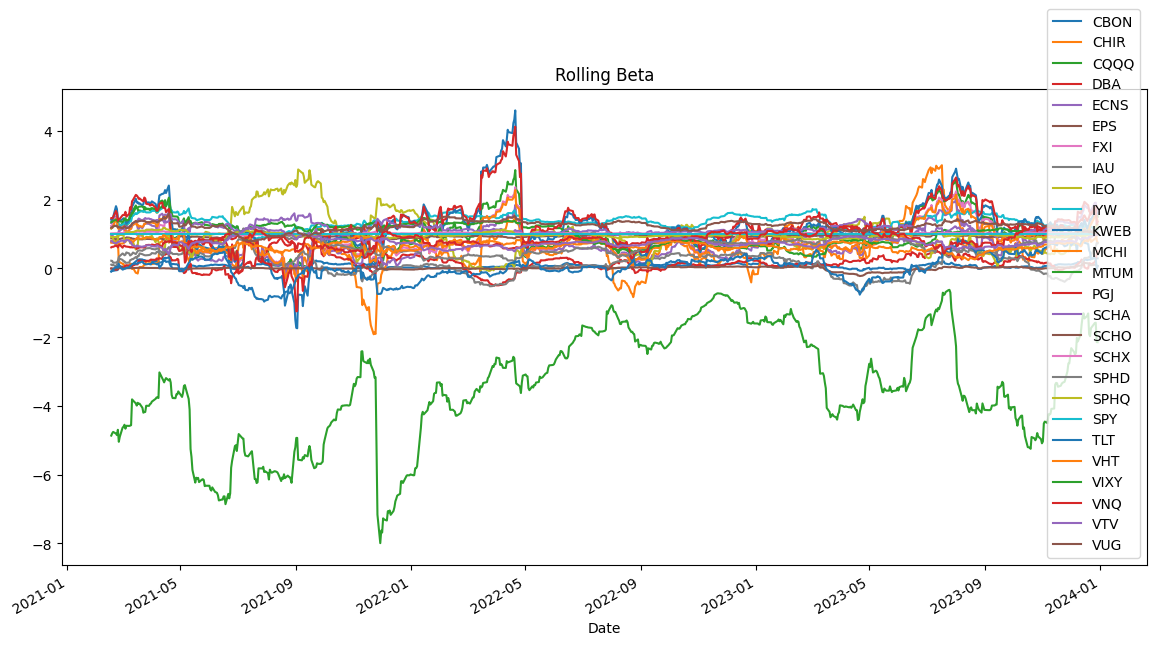

In [28]:
plt.figure(figsize=(14, 7))

plt.subplot()
rolling_betas.plot(title='Rolling Beta', ax=plt.gca())
plt.legend(loc='lower right')


plt.show()

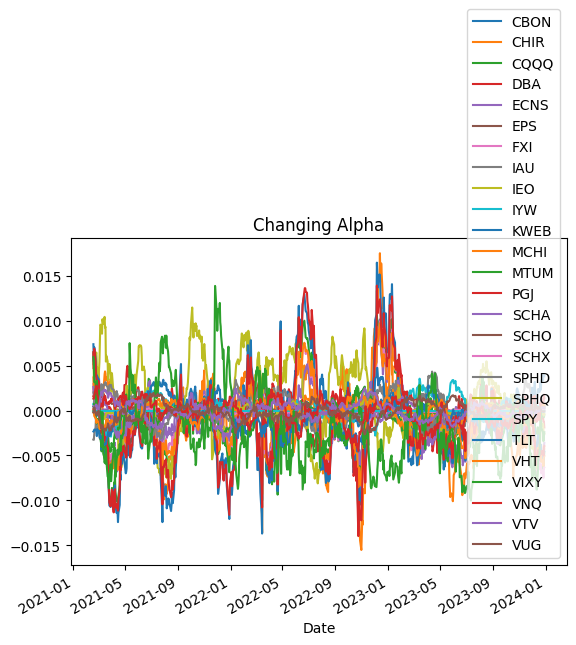

<Figure size 1400x700 with 0 Axes>

In [29]:

changing_alphas.plot(title='Changing Alpha')
plt.legend(loc='lower right')

plt.subplot()
plt.figure(figsize=(14, 7))
plt.tight_layout()
plt.show()

## Equilibrium Returns

### covariance matrix

In [30]:
cov_matrix = returns.cov()*252
cov_matrix


,CBON,CHIR,CQQQ,DBA,ECNS,EPS,FXI,IAU,IEO,IYW,...,SCHO,SCHX,SPHD,SPHQ,TLT,VHT,VIXY,VNQ,VTV,VUG
CBON,0.003036,0.007349,0.008048,0.001085,0.006238,0.002107,0.006768,0.003019,0.002800,0.003479,...,0.000289,0.002392,0.001609,0.002333,0.001286,0.001778,-0.007748,0.002537,0.001575,0.003109
CHIR,0.007349,0.193132,0.096439,0.005632,0.082389,0.016290,0.093994,0.010755,0.027548,0.022879,...,-0.000183,0.017015,0.010726,0.017398,-0.002572,0.009577,-0.063094,0.015586,0.012457,0.021121
CQQQ,0.008048,0.096439,0.156160,0.003089,0.100886,0.026774,0.122856,0.009067,0.026378,0.049667,...,0.000344,0.031398,0.011014,0.029415,0.002650,0.018222,-0.098392,0.022608,0.016654,0.044175
DBA,0.001085,0.005632,0.003089,0.019081,0.003150,0.003737,0.003988,0.004281,0.016051,0.003442,...,-0.000098,0.003693,0.004062,0.003821,-0.002088,0.001863,-0.013510,0.003562,0.004084,0.003259
ECNS,0.006238,0.082389,0.100886,0.003150,0.088239,0.019517,0.085942,0.006619,0.021623,0.033472,...,0.000109,0.022413,0.010397,0.020683,0.001211,0.014137,-0.072885,0.017403,0.013365,0.030141
EPS,0.002107,0.016290,0.026774,0.003737,0.019517,0.027935,0.023111,0.003211,0.027189,0.039037,...,0.000213,0.029507,0.019572,0.028355,0.000853,0.020133,-0.083547,0.025363,0.022558,0.035683
FXI,0.006768,0.093994,0.122856,0.003988,0.085942,0.023111,0.111090,0.008202,0.025043,0.038596,...,0.000131,0.026140,0.012074,0.024773,0.002233,0.015472,-0.083205,0.020870,0.015822,0.035103
IAU,0.003019,0.010755,0.009067,0.004281,0.006619,0.003211,0.008202,0.019853,0.009085,0.004663,...,0.001373,0.003633,0.004341,0.003332,0.008266,0.002806,-0.004963,0.005847,0.003089,0.004039
IEO,0.002800,0.027548,0.026378,0.016051,0.021623,0.027189,0.025043,0.009085,0.120467,0.024758,...,-0.000675,0.026603,0.027744,0.027910,-0.009389,0.014302,-0.090867,0.022257,0.030027,0.023136
IYW,0.003479,0.022879,0.049667,0.003442,0.033472,0.039037,0.038596,0.004663,0.024758,0.070218,...,0.000518,0.044045,0.019009,0.041033,0.004387,0.026789,-0.119425,0.032753,0.025355,0.060811


In [31]:
corr_matrix = returns.corr()
corr_matrix 

,CBON,CHIR,CQQQ,DBA,ECNS,EPS,FXI,IAU,IEO,IYW,...,SCHO,SCHX,SPHD,SPHQ,TLT,VHT,VIXY,VNQ,VTV,VUG
CBON,1.000000,0.303518,0.369644,0.142507,0.381141,0.228831,0.368560,0.388852,0.146407,0.238273,...,0.250448,0.242050,0.192486,0.241829,0.131441,0.213471,-0.208175,0.227423,0.194355,0.241500
CHIR,0.303518,1.000000,0.555316,0.092771,0.631123,0.221778,0.641707,0.173691,0.180606,0.196468,...,-0.019944,0.215834,0.160850,0.226079,-0.032957,0.144160,-0.212528,0.175192,0.192709,0.205675
CQQQ,0.369644,0.555316,1.000000,0.056594,0.859440,0.405382,0.932772,0.162832,0.192316,0.474311,...,0.041586,0.442923,0.183683,0.425089,0.037754,0.305041,-0.368579,0.282598,0.286523,0.478390
DBA,0.142507,0.092771,0.056594,1.000000,0.076756,0.161882,0.086629,0.219953,0.334793,0.094024,...,-0.033811,0.149041,0.193803,0.157986,-0.085122,0.089196,-0.144777,0.127379,0.201008,0.100976
ECNS,0.381141,0.631123,0.859440,0.076756,1.000000,0.393113,0.868035,0.158147,0.209725,0.425236,...,0.017608,0.420605,0.230677,0.397628,0.022953,0.314830,-0.363214,0.289391,0.305878,0.434231
EPS,0.228831,0.221778,0.405382,0.161882,0.393113,1.000000,0.414861,0.136366,0.468693,0.881425,...,0.060859,0.984160,0.771770,0.968854,0.028738,0.796851,-0.739967,0.749583,0.917585,0.913640
FXI,0.368560,0.641707,0.932772,0.086629,0.868035,0.414861,1.000000,0.174655,0.216478,0.436999,...,0.018808,0.437199,0.238747,0.424468,0.037723,0.307087,-0.369543,0.309301,0.322739,0.450710
IAU,0.388852,0.173691,0.162832,0.219953,0.158147,0.136366,0.174655,1.000000,0.185762,0.124885,...,0.465573,0.143732,0.203058,0.135033,0.330318,0.131737,-0.052143,0.204990,0.149036,0.122682
IEO,0.146407,0.180606,0.192316,0.334793,0.209725,0.468693,0.216478,0.185762,1.000000,0.269185,...,-0.092975,0.427266,0.526828,0.459218,-0.152300,0.272592,-0.387547,0.316765,0.588158,0.285256
IYW,0.238273,0.196468,0.474311,0.094024,0.425236,0.881425,0.436999,0.124885,0.269185,1.000000,...,0.093446,0.926573,0.472789,0.884321,0.093217,0.668763,-0.667151,0.610559,0.650516,0.982080


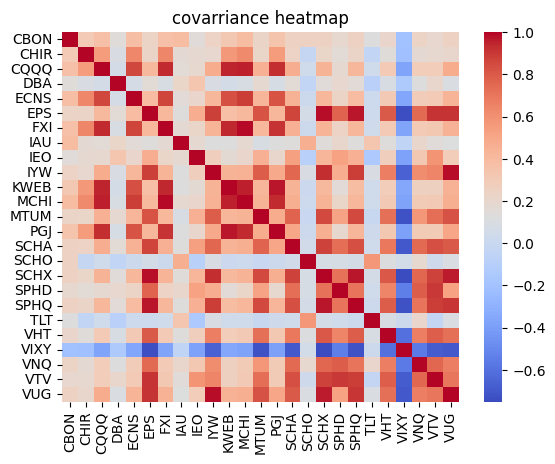

In [32]:
heatmap(corr_matrix, fmt='.2f', cmap='coolwarm')
plt.title('covarriance heatmap')
plt.show()

### Getting market lambda

SPY is the market benchmark, which volatility is 0.175851.

In [33]:
excess_Returns_bm = returns_bm['SPY']-(average_rf)/252
daily_market_sr = excess_Returns_bm.mean()/excess_Returns_bm.std()
annual_market_sr = daily_market_sr*sqrt(252)
annual_market_sr 

0.5216800415429224

In [34]:
delta_market=annual_market_sr/(excess_Returns_bm.std()*sqrt(252))
delta_market

2.966601129702064

### Define different Risk-aversion

In [35]:
risk_aversion = {'Market':delta_market/2,'Near_Kelly_Investors':0.005,'Average_Investors':1.12,'Risk_verse_Investors':3}
risk_aversion

{'Market': 1.483300564851032,
 'Near_Kelly_Investors': 0.005,
 'Average_Investors': 1.12,
 'Risk_verse_Investors': 3}

### Equal Weighting

In [36]:
#Assume a portoflio composed of all assets with equal weighting
w_equal = numofasset * [1./numofasset]
w_equal = array(w_equal)[:,newaxis]
w_equal

array([[0.04],
       [0.04],
       [0.04],
       [0.04],
       [0.04],
       [0.04],
       [0.04],
       [0.04],
       [0.04],
       [0.04],
       [0.04],
       [0.04],
       [0.04],
       [0.04],
       [0.04],
       [0.04],
       [0.04],
       [0.04],
       [0.04],
       [0.04],
       [0.04],
       [0.04],
       [0.04],
       [0.04],
       [0.04]])

#### the Prior return (Reverse Optimisation for equal weighting)

In [37]:
pi_equal = 2*risk_aversion['Market']*cov_matrix @ w_equal
#pi_equal.columns =['The Prior Return(Equal Weighting)']
pi_equal = pi_equal.to_numpy()
pi_equal

array([[ 0.01011334],
       [ 0.11740277],
       [ 0.1512066 ],
       [ 0.01145506],
       [ 0.10777308],
       [ 0.05241746],
       [ 0.12910523],
       [ 0.0171757 ],
       [ 0.06394662],
       [ 0.08115439],
       [ 0.20886053],
       [ 0.12713713],
       [ 0.06100749],
       [ 0.19644072],
       [ 0.07404876],
       [ 0.00102283],
       [ 0.05804095],
       [ 0.033945  ],
       [ 0.05506842],
       [ 0.0083117 ],
       [ 0.03804112],
       [-0.15274267],
       [ 0.05109481],
       [ 0.03983962],
       [ 0.07388543]])

### Market Capacity

In [38]:
num=np.arange(len(asset_symbols))
market_cap=np.zeros(len(asset_symbols))
for i in num:
    etf = yf.Ticker(asset_symbols[i])
    market_cap[i] = etf.info.get('totalAssets')

market_cap

array([2.00549532e+11, 1.55890270e+11, 6.75627827e+09, 2.91879142e+09,
       1.94692485e+10, 1.41168343e+10, 3.67796593e+10, 1.58197545e+10,
       8.40248883e+09, 7.48741248e+08, 5.93319424e+09, 5.61811680e+07,
       4.38037146e+09, 5.37600307e+09, 6.33580600e+06, 6.53983872e+08,
       1.58199024e+08, 1.18931968e+10, 5.16463329e+10, 3.26031680e+07,
       7.31421568e+08, 2.64252723e+10, 7.02153024e+08, 6.48568054e+10,
       1.57311184e+08])

In [39]:
w_market=market_cap/market_cap.sum()
w_market = array(w_market)[:,newaxis]
w_market

array([[3.16094359e-01],
       [2.45705062e-01],
       [1.06488479e-02],
       [4.60042712e-03],
       [3.06862828e-02],
       [2.22501227e-02],
       [5.79699326e-02],
       [2.49341652e-02],
       [1.32435080e-02],
       [1.18012185e-03],
       [9.35155129e-03],
       [8.85494479e-05],
       [6.90408348e-03],
       [8.47333939e-03],
       [9.98612423e-06],
       [1.03077086e-03],
       [2.49343984e-04],
       [1.87453563e-02],
       [8.14019080e-02],
       [5.13871931e-05],
       [1.15282359e-03],
       [4.16499578e-02],
       [1.10669224e-03],
       [1.02223477e-01],
       [2.47944622e-04]])

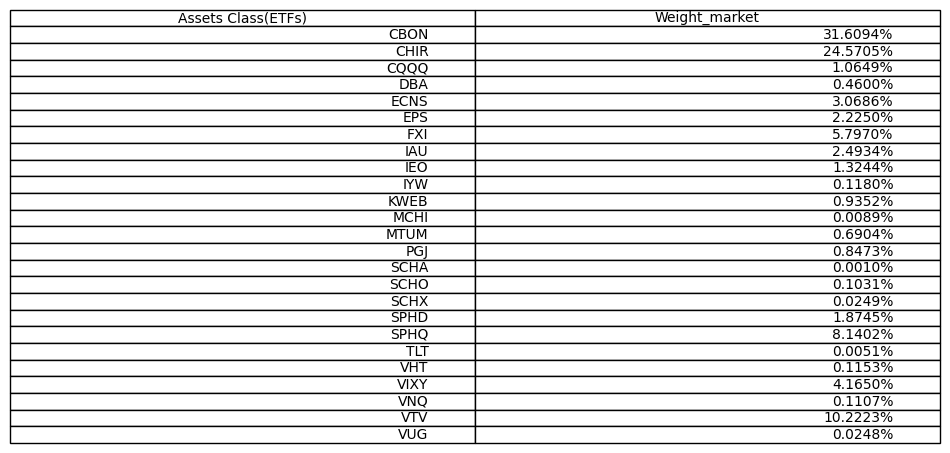

In [90]:
table5_1 = pd.DataFrame(annual_returns.index)
table5_1.columns=['Assets Class(ETFs)']
table5_1['Weight_market']=w_market*100
table5_1['Weight_market'] = table5_1['Weight_market'].apply(lambda x: '{:.4f}%'.format(x))
fig, ax = plt.subplots(figsize=(12, 2))  # set size frame
ax.axis('tight')
ax.axis('off')
ax.table(cellText=table5_1.values, colLabels=table5_1.columns, loc='center')
plt.show()

### The Prior return (Reverse Optimisation for market_cap weighting)

In [40]:
pi_market=2*risk_aversion['Market']*cov_matrix@w_market
#pi_market.columns =['The Prior Return(Market_Cap Weighting)']
pi_market = pi_market.to_numpy()
pi_market

array([[ 0.01145027],
       [ 0.18573988],
       [ 0.12882926],
       [ 0.00877027],
       [ 0.10293075],
       [ 0.03088255],
       [ 0.11964309],
       [ 0.01705379],
       [ 0.04610663],
       [ 0.04389938],
       [ 0.17901983],
       [ 0.11547687],
       [ 0.03467408],
       [ 0.16413491],
       [ 0.04356448],
       [ 0.00047136],
       [ 0.03288022],
       [ 0.02184677],
       [ 0.03293695],
       [ 0.00065852],
       [ 0.02089315],
       [-0.08533008],
       [ 0.02987875],
       [ 0.02455419],
       [ 0.04028511]])

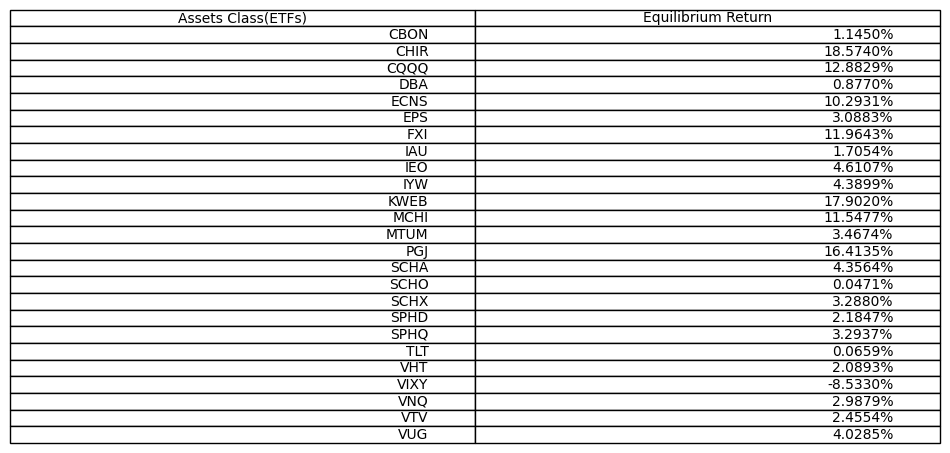

In [91]:
table5_2 = pd.DataFrame(annual_returns.index)
table5_2.columns=['Assets Class(ETFs)']
table5_2['Equilibrium Return']=pi_market*100
table5_2['Equilibrium Return'] = table5_2['Equilibrium Return'].apply(lambda x: '{:.4f}%'.format(x))
fig, ax = plt.subplots(figsize=(12, 2))  # set size frame
ax.axis('tight')
ax.axis('off')
ax.table(cellText=table5_2.values, colLabels=table5_2.columns, loc='center')
plt.show()

## View

In [41]:
def views():
    p = np.array(
        [
            [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0],
            [0,0,0,0,0,0,0,0,0,-1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0],
            [0.125,0.125,0.125,0,0.125,0,0.125,0,-1,0,0.125,0.125,0,0.125,0,0,0,0,0,0,0,0,0,0,0]
        ]
    )
    q = np.array([0.03, 0.05, 0.07])
    q = array(q)[:,newaxis]
    return p,q

In [42]:
P,Q =views()
P

array([[ 0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
         0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
         0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  1.   ,
         0.   ],
       [ 0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
         0.   , -1.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
         0.   ,  0.   ,  0.   ,  0.   ,  1.   ,  0.   ,  0.   ,  0.   ,
         0.   ],
       [ 0.125,  0.125,  0.125,  0.   ,  0.125,  0.   ,  0.125,  0.   ,
        -1.   ,  0.   ,  0.125,  0.125,  0.   ,  0.125,  0.   ,  0.   ,
         0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
         0.   ]])

### Tau

In [43]:
TAU = 0.04
tau_vec = np.array([0.04,0.04,0.04])
print(tau_vec)
tau_vec = np.diag(tau_vec)
print(tau_vec)

[0.04 0.04 0.04]
[[0.04 0.   0.  ]
 [0.   0.04 0.  ]
 [0.   0.   0.04]]


### Error Covariance

In [44]:
omega = multi_dot([P, cov_matrix, P.T])
omega =np.diag(np.diag(omega))*tau_vec
omega

array([[0.00086541, 0.        , 0.        ],
       [0.        , 0.00157967, 0.        ],
       [0.        , 0.        , 0.00723898]])

### Calculate the black litterman return(the posterior)

In [45]:
def cal_posterior_return(pi: np.array, covariance_matrix: np.matrix, P:np.matrix, Q: np.array, omega: np.matrix):
    
    """
    params pi: The equilibrium return.
    params cov_matrix: The covariance matrix.
    params P: The matrix that identifies the assets involved in the views.
    params Q: The view vector.
    params omega: The diagonal covariance matrix of error terms.
    return The posterior return vector
    """

    part1 = multi_dot([
        covariance_matrix,
        P.T,
        inv(TAU * multi_dot([P, covariance_matrix, P.T]) + omega)
    ])
    part2 = Q - np.dot(P, pi)
    posterior_return = pi + TAU * np.dot(part1, part2)
    return posterior_return

In [69]:
post_bl_return= cal_posterior_return(pi_market,cov_matrix,P,Q,omega)
#post_bl_return.columns =['The Posterior Return']
post_bl_return

array([[ 0.01040752],
       [ 0.17855663],
       [ 0.10607036],
       [ 0.00824257],
       [ 0.0900493 ],
       [ 0.01962731],
       [ 0.10422637],
       [ 0.01620726],
       [ 0.04318977],
       [ 0.0104257 ],
       [ 0.14962731],
       [ 0.09953031],
       [ 0.02164131],
       [ 0.13407708],
       [ 0.03108727],
       [ 0.00037883],
       [ 0.0186495 ],
       [ 0.0237532 ],
       [ 0.02066323],
       [-0.00125991],
       [ 0.02253642],
       [-0.050748  ],
       [ 0.02504162],
       [ 0.02329869],
       [ 0.01425312]])

### weight with no constraints

In [70]:
def cal_posterior_weight(risk_aversion, post_return, covariance_matrix):
    params=1/(2*risk_aversion)
    post_weight=params*np.dot(inv(covariance_matrix),post_return)
    return post_weight

In [71]:
post_bl_weight= cal_posterior_weight(risk_aversion['Average_Investors'],post_bl_return,cov_matrix)
post_bl_weight

array([[ 4.19898541e-01],
       [ 3.26676679e-01],
       [ 1.53739874e-02],
       [ 6.09269299e-03],
       [ 4.19110753e-02],
       [ 2.94675175e-02],
       [ 7.80448728e-02],
       [ 3.30221977e-02],
       [ 7.37206464e-03],
       [-4.26750690e-01],
       [ 1.36558796e-02],
       [ 1.38818684e-03],
       [ 9.14359904e-03],
       [ 1.24927972e-02],
       [ 1.32253783e-05],
       [ 1.36512768e-03],
       [ 3.30225064e-04],
       [ 2.48258907e-02],
       [ 1.07806693e-01],
       [ 6.80559397e-05],
       [ 4.29840386e-01],
       [ 5.51601838e-02],
       [ 1.46567609e-03],
       [ 2.73659661e-01],
       [ 3.28371784e-04]])

## Optimisation

### Global Minimum Variance Portfolio

In [72]:
def optimize_gmvp(cov_matrix):
    num_assets = len(cov_matrix)
    weights_GMVP = cp.Variable(num_assets)
    risk = cp.quad_form(weights_GMVP, cov_matrix)
    objective = cp.Minimize(risk)
    constraints =[]
    constraints.append(cp.sum(weights_GMVP) == 1)
    constraints.append(weights_GMVP >=0)
    constraints.append(weights_GMVP <=1)
    problem = cp.Problem(objective, constraints)
    problem.solve()
    
    if problem.status == 'optimal':
        optimal_weights_GMVP = weights_GMVP.value.round(16)+0.0
        optimal_weights_GMVP = optimal_weights_GMVP.reshape(-1,1)
        print("Optimal Weights:", optimal_weights_GMVP)
        return optimal_weights_GMVP
        
    else:
        return none
    
    

In [73]:
optimal_weights_GMVP = optimize_gmvp(cov_matrix)

Optimal Weights: [[3.64328430e-02]
 [5.47155326e-04]
 [0.00000000e+00]
 [1.97087024e-02]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [3.95922052e-03]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [9.91658206e-03]
 [0.00000000e+00]
 [0.00000000e+00]
 [9.16259807e-01]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [4.92423413e-03]
 [0.00000000e+00]
 [8.25145527e-03]
 [0.00000000e+00]]


### Markowitz Mean-Variance Portfolio

In [231]:
def optimize_meanvariance(returns,cov_matrix,risk_aversion):
    num_assets = len(returns)
    weights_mv = cp.Variable(num_assets)
    #reshape the original returns

    #formula
    expected_returns= weights_mv @ returns
    risk = cp.quad_form(weights_mv, cov_matrix)
    objective = cp.Maximize(expected_returns-risk_aversion*risk)
    #constraits
    constraints =[]
    constraints.append(cp.sum(weights_mv) == 1)
    constraints.append(weights_mv >=0)
    constraints.append(weights_mv <=1)
    problem = cp.Problem(objective, constraints)
    problem.solve()
    
    if problem.status == 'optimal':
        optimal_weights_mv = weights_mv.value.round(16)+0.0
        optimal_weights_mv = optimal_weights_mv.reshape(-1,1)
        
        return optimal_weights_mv
        
    else:
        return none

    

In [75]:

optimal_weights_mv = optimize_meanvariance(post_bl_return,cov_matrix,risk_aversion['Average_Investors'])

Optimal Weights: [[0.        ]
 [0.35155319]
 [0.        ]
 [0.        ]
 [0.0182441 ]
 [0.        ]
 [0.08341698]
 [0.00313612]
 [0.03652592]
 [0.        ]
 [0.        ]
 [0.01158331]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.17932221]
 [0.        ]
 [0.        ]
 [0.23833823]
 [0.07787994]
 [0.        ]
 [0.        ]
 [0.        ]]


### Maximum Sharpe Ratio Portfolio

In [53]:
def optimize_maxsharpe(returns,cov_matrix,riskfree):
    num_assets = len(returns)
    weights_ms = cp.Variable(num_assets)
    #epsilon = 1e-6
    #cov_matrix += epsilon * np.eye(num_assets)
    #formula
    expected_returns= weights_ms @ returns
    #risk = cp.quad_form(weights_ms, cov_matrix)
    risk = cp.norm(cp.sqrt(cov_matrix) @ weights_ms)
    sharpe_ratio = (expected_returns-riskfree)/risk
    objective = cp.Minimize(-1 / cp.square(sharpe_ratio))
    #constraits
    constraints =[]
    constraints.append(cp.sum(weights_ms) == 1)
    #constraints.append(weights_ms >=0)
    #constraints.append(weights_ms <=1)
    problem = cp.Problem(objective, constraints)
    problem.solve(solver=cp.SCS)
    
    if problem.status == 'optimal':
        optimal_weights_ms = weights_ms.value.round(16)+0.0
        optimal_weights_ms = optimal_weights_ms.reshape(-1,1)
        print("Optimal Weights:", optimal_weights_ms)
        return optimal_weights_ms
        
    else:
        return none



In [63]:
#optimal_weights_sr = optimize_maxsharpe(post_bl_return,cov_matrix,average_rf)
#optimal_weights_sr

In [55]:
def sharpe_ratio(weights, expected_returns, cov_matrix, risk_free_rate):
    expected_return = np.sum(weights * expected_returns)
    volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    return (expected_return - risk_free_rate) / volatility


In [81]:
num_assets = len(asset_symbols)
weights_maxsr = np.random.rand(num_assets)
weights_maxsr /= np.sum(weights_maxsr) 

iterations = 1000
learning_rate = 0.01

for i in range(iterations):
    gradient = np.zeros(num_assets)
    for j in range(num_assets):
        delta = 1e-5
        weights_up = np.copy(weights_maxsr)
        weights_up[j] += delta
        gradient[j] = (sharpe_ratio(weights_up, post_bl_return,cov_matrix,average_rf) - 
                       sharpe_ratio(weights_maxsr, post_bl_return,cov_matrix,average_rf)) / delta
    weights_maxsr += learning_rate * gradient
    weights_maxsr = np.maximum(weights_maxsr, 0) 
    weights_maxsr /= np.sum(weights_maxsr) 

print("Optimal Weights:", weights_maxsr)

Optimal Weights: [0.0642856  0.02780961 0.02848576 0.05399182 0.03565834 0.04839909
 0.02910223 0.03469657 0.02381401 0.0413295  0.02964714 0.0317156
 0.0598815  0.02926967 0.03974181 0.06758912 0.04749669 0.0430333
 0.04712653 0.038102   0.05055217 0.         0.03353917 0.05097634
 0.04375643]


In [82]:
weights_maxsr = weights_maxsr[:,newaxis]
weights_maxsr

array([[0.0642856 ],
       [0.02780961],
       [0.02848576],
       [0.05399182],
       [0.03565834],
       [0.04839909],
       [0.02910223],
       [0.03469657],
       [0.02381401],
       [0.0413295 ],
       [0.02964714],
       [0.0317156 ],
       [0.0598815 ],
       [0.02926967],
       [0.03974181],
       [0.06758912],
       [0.04749669],
       [0.0430333 ],
       [0.04712653],
       [0.038102  ],
       [0.05055217],
       [0.        ],
       [0.03353917],
       [0.05097634],
       [0.04375643]])

## Results and visualization

### With no contraints

In [58]:
table6 = pd.DataFrame(annual_returns.index)
table6.columns=['Assets Class(ETFs)']
table6['The Posterior Return E[R]']=post_bl_return*100
table6['The Posterior Return E[R]'] = table6['The Posterior Return E[R]'].apply(lambda x: '{:.4f}%'.format(x))

table6['The Prior Return π']=pi_equal*100
table6['The Prior Return π'] = table6['The Prior Return π'].apply(lambda x: '{:.4f}%'.format(x))

table6['Difference E[R]-π']=(post_bl_return-pi_equal)*100
table6['Difference E[R]-π'] = table6['Difference E[R]-π'].apply(lambda x: '{:.4f}%'.format(x))

table6['The Posterior Weight w_bl']=post_bl_weight*100
table6['The Posterior Weight w_bl'] = table6['The Posterior Weight w_bl'].apply(lambda x: '{:.4f}%'.format(x))

table6['Equal Weight w_eq']=w_equal*100
table6['Equal Weight w_eq'] = table6['Equal Weight w_eq'].apply(lambda x: '{:.4f}%'.format(x))

table6['Difference w_bl-w_eq']=(post_bl_weight-w_equal)*100
table6['Difference w_bl-w_eq'] = table6['Difference w_bl-w_eq'].apply(lambda x: '{:.4f}%'.format(x))

table6

,Assets Class(ETFs),The Posterior Return E[R],The Prior Return π,Difference E[R]-π,The Posterior Weight w_bl,Equal Weight w_eq,Difference w_bl-w_eq
0,CBON,0.8346%,1.0113%,-0.1767%,5.5995%,4.0000%,1.5995%
1,CHIR,10.5791%,11.7403%,-1.1612%,5.5995%,4.0000%,1.5995%
2,CQQQ,11.9319%,15.1207%,-3.1888%,5.5995%,4.0000%,1.5995%
3,DBA,0.8957%,1.1455%,-0.2498%,5.2975%,4.0000%,1.2975%
4,ECNS,8.8540%,10.7773%,-1.9233%,5.5995%,4.0000%,1.5995%
5,EPS,2.9903%,5.2417%,-2.2515%,5.2975%,4.0000%,1.2975%
6,FXI,10.6194%,12.9105%,-2.2911%,5.5995%,4.0000%,1.5995%
7,IAU,1.4946%,1.7176%,-0.2230%,5.2975%,4.0000%,1.2975%
8,IEO,4.6608%,6.3947%,-1.7339%,2.8817%,4.0000%,-1.1183%
9,IYW,3.0554%,8.1154%,-5.0600%,-47.7994%,4.0000%,-51.7994%


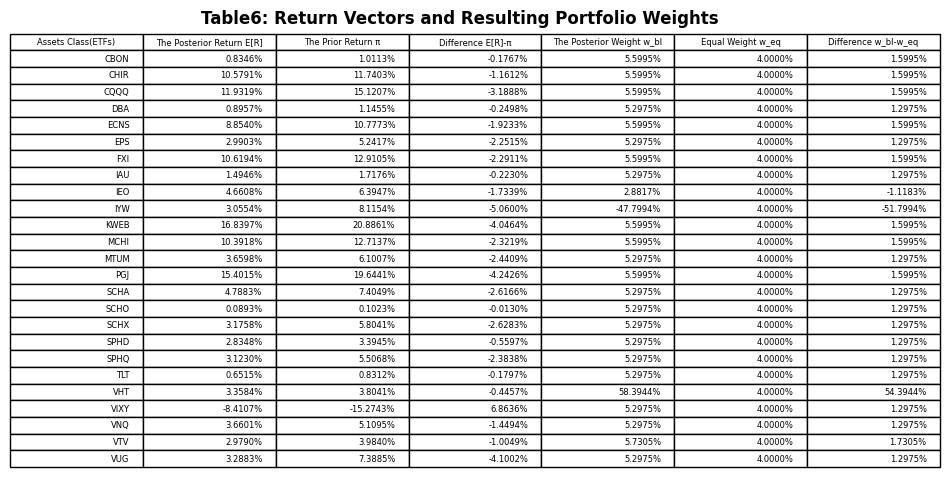

In [68]:
fig, ax = plt.subplots(figsize=(12, 2))  # set size frame
plt.suptitle('Table6: Return Vectors and Resulting Portfolio Weights', fontweight='bold',y=1.7)
ax.axis('tight')
ax.axis('off')
ax.table(cellText=table6.values, colLabels=table6.columns, loc='center')
plt.show()

In [85]:
table7 = pd.DataFrame(annual_returns.index)
table7.columns=['Assets Class(ETFs)']
table7['The Posterior Return E[R]']=post_bl_return*100
table7['The Posterior Return E[R]'] = table7['The Posterior Return E[R]'].apply(lambda x: '{:.4f}%'.format(x))

table7['The Prior Return π']=pi_market*100
table7['The Prior Return π'] = table7['The Prior Return π'].apply(lambda x: '{:.4f}%'.format(x))

table7['Difference E[R]-π']=(post_bl_return-pi_market)*100
table7['Difference E[R]-π'] = table7['Difference E[R]-π'].apply(lambda x: '{:.4f}%'.format(x))

table7['The Posterior Weight w_bl']=post_bl_weight*100
table7['The Posterior Weight w_bl'] = table7['The Posterior Weight w_bl'].apply(lambda x: '{:.4f}%'.format(x))

table7['Market_Cap Weight w_mrk']=w_market*100
table7['Market_Cap Weight w_mrk'] = table7['Market_Cap Weight w_mrk'].apply(lambda x: '{:.4f}%'.format(x))

table7['Difference w_bl-w_mrk']=(post_bl_weight-w_market)*100
table7['Difference w_bl-w_mrk'] = table7['Difference w_bl-w_mrk'].apply(lambda x: '{:.4f}%'.format(x))

table7

,Assets Class(ETFs),The Posterior Return E[R],The Prior Return π,Difference E[R]-π,The Posterior Weight w_bl,Market_Cap Weight w_mrk,Difference w_bl-w_mrk
0,CBON,1.0408%,1.1450%,-0.1043%,41.9899%,31.6094%,10.3804%
1,CHIR,17.8557%,18.5740%,-0.7183%,32.6677%,24.5705%,8.0972%
2,CQQQ,10.6070%,12.8829%,-2.2759%,1.5374%,1.0649%,0.4725%
3,DBA,0.8243%,0.8770%,-0.0528%,0.6093%,0.4600%,0.1492%
4,ECNS,9.0049%,10.2931%,-1.2881%,4.1911%,3.0686%,1.1225%
5,EPS,1.9627%,3.0883%,-1.1255%,2.9468%,2.2250%,0.7217%
6,FXI,10.4226%,11.9643%,-1.5417%,7.8045%,5.7970%,2.0075%
7,IAU,1.6207%,1.7054%,-0.0847%,3.3022%,2.4934%,0.8088%
8,IEO,4.3190%,4.6107%,-0.2917%,0.7372%,1.3244%,-0.5871%
9,IYW,1.0426%,4.3899%,-3.3474%,-42.6751%,0.1180%,-42.7931%


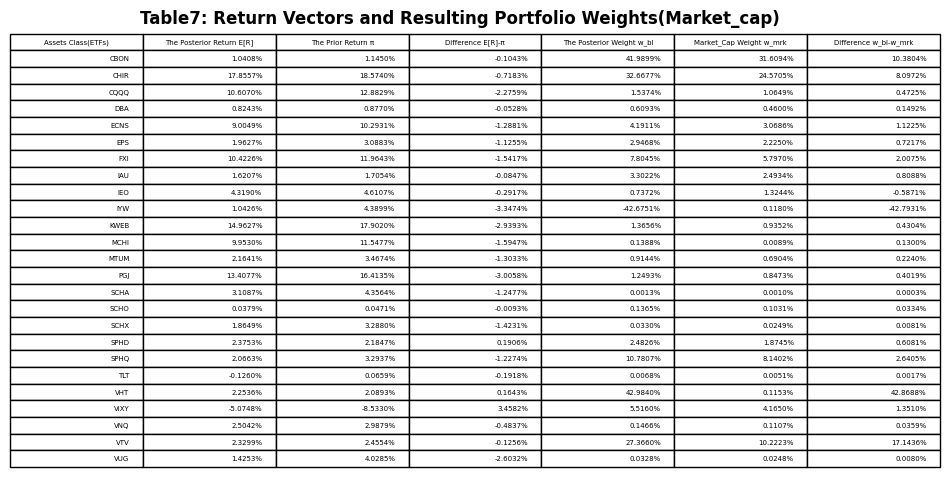

In [87]:
fig, ax = plt.subplots(figsize=(12, 2))  # set size frame
plt.suptitle('Table7: Return Vectors and Resulting Portfolio Weights(Market_cap)', fontweight='bold',y=1.7)
ax.axis('tight')
ax.axis('off')
ax.table(cellText=table7.values, colLabels=table7.columns, loc='center')
plt.show()

In [122]:
table8 = pd.DataFrame(annual_returns.index)
table8.columns=['Assets Class(ETFs)']

table8['Market_Cap\nWeight w_mrk']=w_market*100
table8['Market_Cap\nWeight w_mrk'] = table8['Market_Cap\nWeight w_mrk'].apply(lambda x: '{:.4f}%'.format(x))

table8['The BL Weight\n(with no contraints)']=post_bl_weight*100
table8['The BL Weight\n(with no contraints)'] = table8['The BL Weight\n(with no contraints)'].apply(lambda x: '{:.4f}%'.format(x))

table8['GMVP\nWeight']=optimal_weights_GMVP*100
table8['GMVP\nWeight'] = table8['GMVP\nWeight'].apply(lambda x: '{:.4f}%'.format(x))

table8['Mean-Varriance\nWeight']=optimal_weights_mv*100
table8['Mean-Varriance\nWeight'] = table8['Mean-Varriance\nWeight'].apply(lambda x: '{:.4f}%'.format(x))

table8['Maximum_SR\nWeight']=weights_maxsr*100
table8['Maximum_SR\nWeight'] = table8['Maximum_SR\nWeight'].apply(lambda x: '{:.4f}%'.format(x))

table8

,Assets Class(ETFs),Market_Cap\nWeight w_mrk,The BL Weight\n(with no contraints),GMVP\nWeight,Mean-Varriance\nWeight,Maximum_SR\nWeight
0,CBON,31.6094%,41.9899%,3.6433%,0.0000%,6.4286%
1,CHIR,24.5705%,32.6677%,0.0547%,35.1553%,2.7810%
2,CQQQ,1.0649%,1.5374%,0.0000%,0.0000%,2.8486%
3,DBA,0.4600%,0.6093%,1.9709%,0.0000%,5.3992%
4,ECNS,3.0686%,4.1911%,0.0000%,1.8244%,3.5658%
5,EPS,2.2250%,2.9468%,0.0000%,0.0000%,4.8399%
6,FXI,5.7970%,7.8045%,0.0000%,8.3417%,2.9102%
7,IAU,2.4934%,3.3022%,0.0000%,0.3136%,3.4697%
8,IEO,1.3244%,0.7372%,0.3959%,3.6526%,2.3814%
9,IYW,0.1180%,-42.6751%,0.0000%,0.0000%,4.1330%


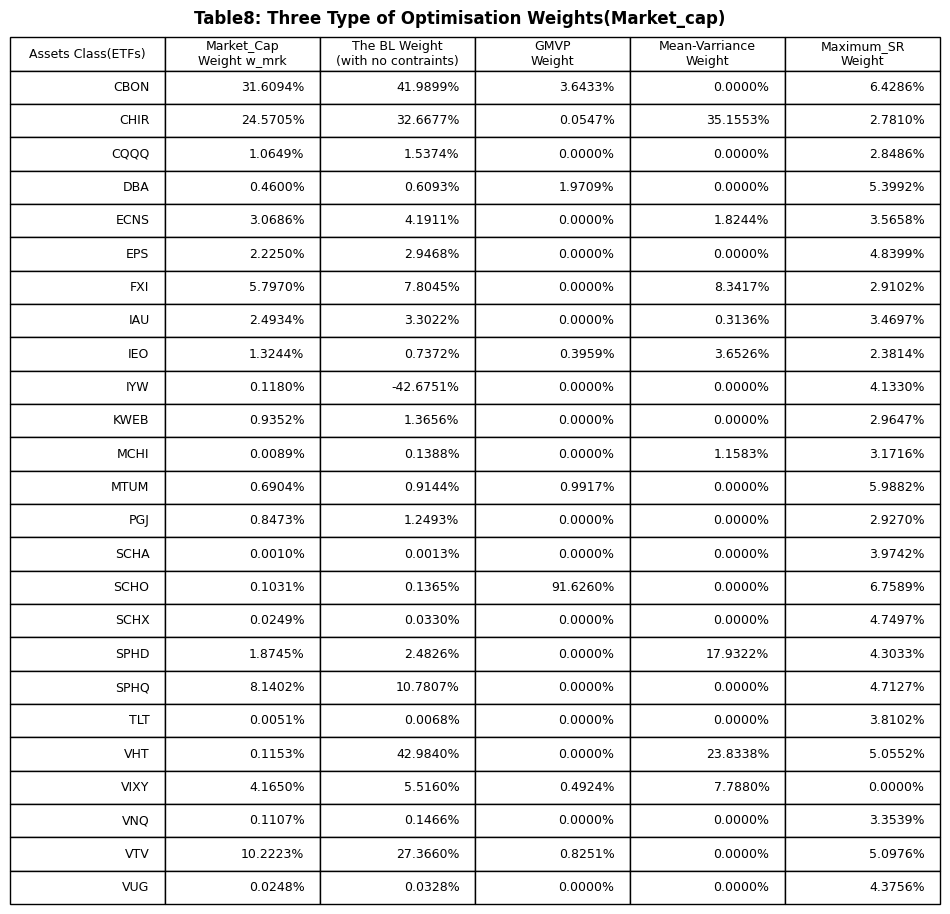

In [123]:
fig, ax = plt.subplots(figsize=(12, 2))  # set size frame
plt.suptitle('Table8: Three Type of Optimisation Weights(Market_cap)', fontweight='bold',y=2.8)
ax.axis('tight')
ax.axis('off')

table = ax.table(cellText=table8.values, colLabels=table8.columns, loc='center')
table.scale(1, 2)
plt.show()

### Different risk aversion

Kelly

In [128]:
pi_market_kelly=2*risk_aversion['Near_Kelly_Investors']*cov_matrix@w_market
#pi_market_kelly.columns =['The Prior Return(Market_Cap Weighting)']
pi_market_kelly = pi_market_kelly.to_numpy()
post_bl_return_kelly= cal_posterior_return(pi_market_kelly,cov_matrix,P,Q,omega)
#post_bl_return.columns =['The Posterior Return']
post_bl_weight_kelly= cal_posterior_weight(risk_aversion['Near_Kelly_Investors'],post_bl_return_kelly,cov_matrix)
post_bl_weight_kelly

array([[ 3.58275195e+00],
       [ 3.51236265e+00],
       [ 3.27730644e+00],
       [ 4.60042712e-03],
       [ 3.29734387e+00],
       [ 2.22501227e-02],
       [ 3.32462752e+00],
       [ 2.49341652e-02],
       [-2.61200172e+01],
       [-7.72815416e+01],
       [ 3.27600914e+00],
       [ 3.26674614e+00],
       [ 6.90408348e-03],
       [ 3.27513093e+00],
       [ 9.98612397e-06],
       [ 1.03077086e-03],
       [ 2.49343985e-04],
       [ 1.87453563e-02],
       [ 8.14019080e-02],
       [ 5.13871930e-05],
       [ 7.72838745e+01],
       [ 4.16499578e-02],
       [ 1.10669224e-03],
       [ 9.26353566e+01],
       [ 2.47944623e-04]])

Average

In [129]:
pi_market_average=2*risk_aversion['Average_Investors']*cov_matrix@w_market
#pi_market_average.columns =['The Prior Return(Market_Cap Weighting)']
pi_market_average = pi_market_average.to_numpy()
post_bl_return_average= cal_posterior_return(pi_market_average,cov_matrix,P,Q,omega)
#post_bl_return_average.columns =['The Posterior Return']
post_bl_weight_average= cal_posterior_weight(risk_aversion['Average_Investors'],post_bl_return_average,cov_matrix)
post_bl_weight_average

array([[ 3.20636864e-01],
       [ 2.50247567e-01],
       [ 1.51913529e-02],
       [ 4.60042712e-03],
       [ 3.52287878e-02],
       [ 2.22501227e-02],
       [ 6.25124376e-02],
       [ 2.49341652e-02],
       [-2.30965323e-02],
       [-4.06661696e-01],
       [ 1.38940563e-02],
       [ 4.63105448e-03],
       [ 6.90408348e-03],
       [ 1.30158444e-02],
       [ 9.98612423e-06],
       [ 1.03077086e-03],
       [ 2.49343983e-04],
       [ 1.87453563e-02],
       [ 8.14019080e-02],
       [ 5.13871931e-05],
       [ 4.08994641e-01],
       [ 4.16499578e-02],
       [ 1.10669224e-03],
       [ 3.08038660e-01],
       [ 2.47944623e-04]])

Trustee

In [130]:
pi_market_trustee=2*risk_aversion['Risk_verse_Investors']*cov_matrix@w_market
#pi_market_trustee.columns =['The Prior Return(Market_Cap Weighting)']
pi_market_trustee = pi_market_trustee.to_numpy()
post_bl_return_trustee= cal_posterior_return(pi_market_trustee,cov_matrix,P,Q,omega)
#post_bl_return_trustee.columns =['The Posterior Return']
post_bl_weight_trustee= cal_posterior_weight(risk_aversion['Risk_verse_Investors'],post_bl_return_trustee,cov_matrix)
post_bl_weight_trustee

array([[ 3.11469785e-01],
       [ 2.41080487e-01],
       [ 6.02427314e-03],
       [ 4.60042712e-03],
       [ 2.60617080e-02],
       [ 2.22501227e-02],
       [ 5.33453579e-02],
       [ 2.49341652e-02],
       [ 5.02401058e-02],
       [-1.90630643e-01],
       [ 4.72697657e-03],
       [-4.53602528e-03],
       [ 6.90408348e-03],
       [ 3.84876467e-03],
       [ 9.98612423e-06],
       [ 1.03077086e-03],
       [ 2.49343983e-04],
       [ 1.87453563e-02],
       [ 8.14019080e-02],
       [ 5.13871931e-05],
       [ 1.92963589e-01],
       [ 4.16499578e-02],
       [ 1.10669224e-03],
       [ 4.85837158e-02],
       [ 2.47944623e-04]])

In [131]:
table9 = pd.DataFrame(annual_returns.index)
table9.columns=['Assets Class(ETFs)']
table9['weight_BL\nRealMarket']=post_bl_weight*100
table9['weight_BL\nRealMarket'] = table9['weight_BL\nRealMarket'].apply(lambda x: '{:.4f}%'.format(x))

table9['weight_BL\nKelly']=post_bl_weight_kelly*100
table9['weight_BL\nKelly'] = table9['weight_BL\nKelly'].apply(lambda x: '{:.4f}%'.format(x))

table9['weight_BL\nAverageMarket']=post_bl_weight_average*100
table9['weight_BL\nAverageMarket'] = table9['weight_BL\nAverageMarket'].apply(lambda x: '{:.4f}%'.format(x))


table9['weight_BL\nTrustee']=post_bl_weight_trustee*100
table9['weight_BL\nTrustee'] = table9['weight_BL\nTrustee'].apply(lambda x: '{:.4f}%'.format(x))

table9

,Assets Class(ETFs),weight_BL\nRealMarket,weight_BL\nKelly,weight_BL\nAverageMarket,weight_BL\nTrustee
0,CBON,41.9899%,358.2752%,32.0637%,31.1470%
1,CHIR,32.6677%,351.2363%,25.0248%,24.1080%
2,CQQQ,1.5374%,327.7306%,1.5191%,0.6024%
3,DBA,0.6093%,0.4600%,0.4600%,0.4600%
4,ECNS,4.1911%,329.7344%,3.5229%,2.6062%
5,EPS,2.9468%,2.2250%,2.2250%,2.2250%
6,FXI,7.8045%,332.4628%,6.2512%,5.3345%
7,IAU,3.3022%,2.4934%,2.4934%,2.4934%
8,IEO,0.7372%,-2612.0017%,-2.3097%,5.0240%
9,IYW,-42.6751%,-7728.1542%,-40.6662%,-19.0631%


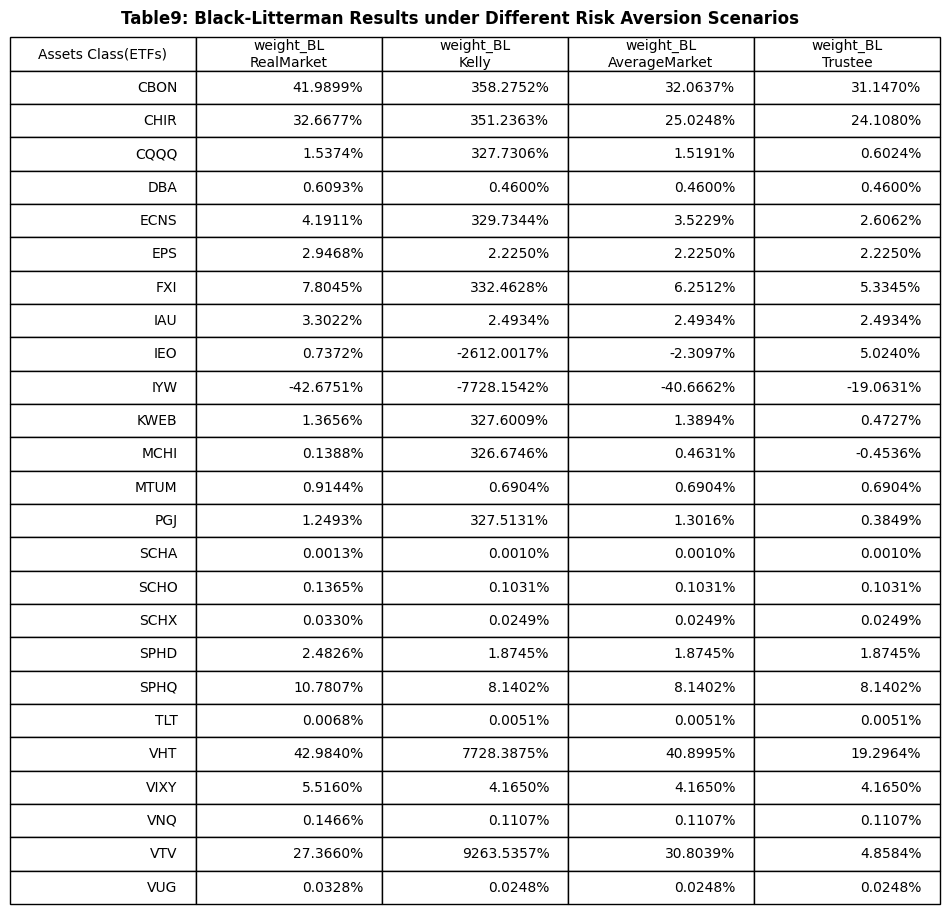

In [132]:
fig, ax = plt.subplots(figsize=(12, 2))  # set size frame
plt.suptitle('Table9: Black-Litterman Results under Different Risk Aversion Scenarios', fontweight='bold',y=2.8)
ax.axis('tight')
ax.axis('off')

table = ax.table(cellText=table9.values, colLabels=table9.columns, loc='center')
table.scale(1, 2)
plt.show()

### Different volatility(reference model vs posterior model)

for i in range(0,1.01,0.01)
arange(0, 1.01, 0.01)
t_vec = np.array([0.04,0.04,0.04])
print(tau_vec)
tau_vec = np.diag(tau_vec)
print(tau_vec)
omega_tau = multi_dot([P, cov_matrix, P.T])
omega_tau=np.diag(np.diag(omega))*tau_vec
omega_tau
post_bl_returnt_tau= cal_posterior_return(pi_market,cov_matrix,P,Q,omega)
post_bl_weight_tau= cal_posterior_weight(risk_aversion['Average_Investors'],post_bl_return_tau,cov_matrix)
eight_tau[10],weight_tau[11],
weight_tau[12],weight_tau[13],weight_tau[14],weight_tau[15],weight_tau[16],weight_tau[17],weight_tau[18],weight_tau[19],weight_tau[20],weight_tau[21],weight_tau[22]

In [246]:
omega_tau = multi_dot([P, cov_matrix, P.T])
omega_tau=np.diag(np.diag(omega_tau)) 
weight_tau = pd.DataFrame(annual_returns.index)
for i in np.arange(0,1,0.1):
    t_vec=np.zeros(3)
    t_vec[:]=i
    t_vec=np.diag(t_vec)
    factor=omega_tau* t_vec
    post_bl_return_tau= cal_posterior_return(pi_market,cov_matrix,P,Q,factor)
    post_bl_weight_tau= optimize_meanvariance(post_bl_return_tau,cov_matrix,risk_aversion['Average_Investors'])
    #post_bl_weight_tau=post_bl_weight_tau.reshape(-1,1)
    weight_tau[str("{:.1f}".format(i))] = post_bl_weight_tau
    

print(weight_tau)


       0       0.0       0.1       0.2       0.3       0.4       0.5  \
0   CBON  0.000000  0.098594  0.137050  0.149095  0.155819  0.158730   
1   CHIR  0.382487  0.338379  0.332618  0.330873  0.329972  0.329524   
2   CQQQ  0.000000  0.000000  0.003963  0.013866  0.018514  0.019495   
3    DBA  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
4   ECNS  0.000000  0.025730  0.031320  0.032626  0.033639  0.034631   
5    EPS  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
6    FXI  0.046888  0.073779  0.068409  0.071325  0.072295  0.072555   
7    IAU  0.000000  0.015851  0.025402  0.030105  0.032653  0.033819   
8    IEO  0.000000  0.040288  0.034009  0.029764  0.027350  0.026394   
9    IYW  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
10  KWEB  0.000000  0.000000  0.004852  0.000000  0.000000  0.000000   
11  MCHI  0.000000  0.041611  0.042174  0.029318  0.021536  0.018099   
12  MTUM  0.000000  0.000000  0.000000  0.000000  0.000000  0.00

### performance my portfolio vs bench mark

In [212]:
weighted_log_returns = np.dot(log_returns, weights_maxsr)
spy_returns=log_returns_bm['SPY'].to_numpy()
data4=pd.DataFrame(index=log_returns.index)
data4['Portfolio_maxSR']=weighted_log_returns
data4['SPY']=spy_returns
data4.fillna(0)
data4

,Portfolio_maxSR,SPY
Date,,
2021-01-04,NaN,NaN
2021-01-05,0.010541,0.006863
2021-01-06,0.000591,0.005961
2021-01-07,0.009669,0.014748
2021-01-08,0.007533,0.005682
...,...,...
2023-12-22,-0.003446,0.002008
2023-12-26,0.004748,0.004214
2023-12-27,0.001429,0.001806


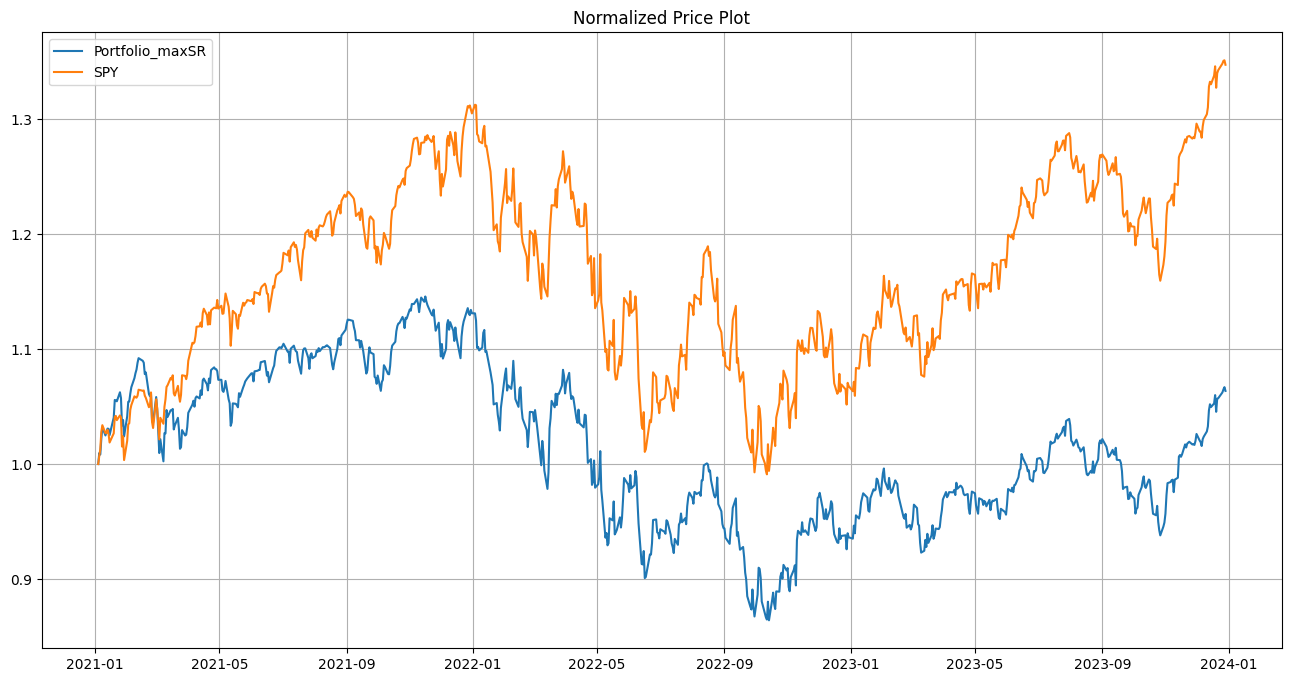

In [215]:
weighted_close = np.dot(data, weights_maxsr)
spy_close=data2['SPY'].to_numpy()
data5=pd.DataFrame(index=log_returns.index)
data5['Portfolio_maxSR']=weighted_close
data5['SPY']=spy_close
data5.fillna(0)
data5
# Visualize the data
fig = plt.figure(figsize=(16,8))
ax = plt.axes()

ax.set_title('Normalized Price Plot')
ax.plot(data5[-753:]/data5.iloc[-753] * 1)
ax.legend(data5.columns, loc='upper left')
ax.grid(True)

In [216]:
returns_alphabeta_portfolio = data4


rolling_betas_portfolio = returns_alphabeta_portfolio.apply(lambda x: calculate_rolling_beta(x, returns_alphabeta_portfolio['SPY'], window_size))


market_excess_return = returns_alphabeta_portfolio['SPY'] 
#average_rf


changing_alphas_portfolio = returns_alphabeta_portfolio.apply(lambda x: calculate_changing_alpha(x, market_excess_return, rolling_betas_portfolio[x.name], window_size))

rolling_betas_portfolio['Portfolio_maxSR'].dropna().tail(), changing_alphas_portfolio['Portfolio_maxSR'].dropna().tail()

(Date
 2023-12-22    0.904123
 2023-12-26    0.982751
 2023-12-27    0.999180
 2023-12-28    0.974026
 2023-12-29    0.960621
 Name: Portfolio_maxSR, dtype: float64,
 Date
 2023-12-22   -0.001014
 2023-12-26   -0.000958
 2023-12-27   -0.001137
 2023-12-28   -0.000882
 2023-12-29   -0.000895
 Name: Portfolio_maxSR, dtype: float64)

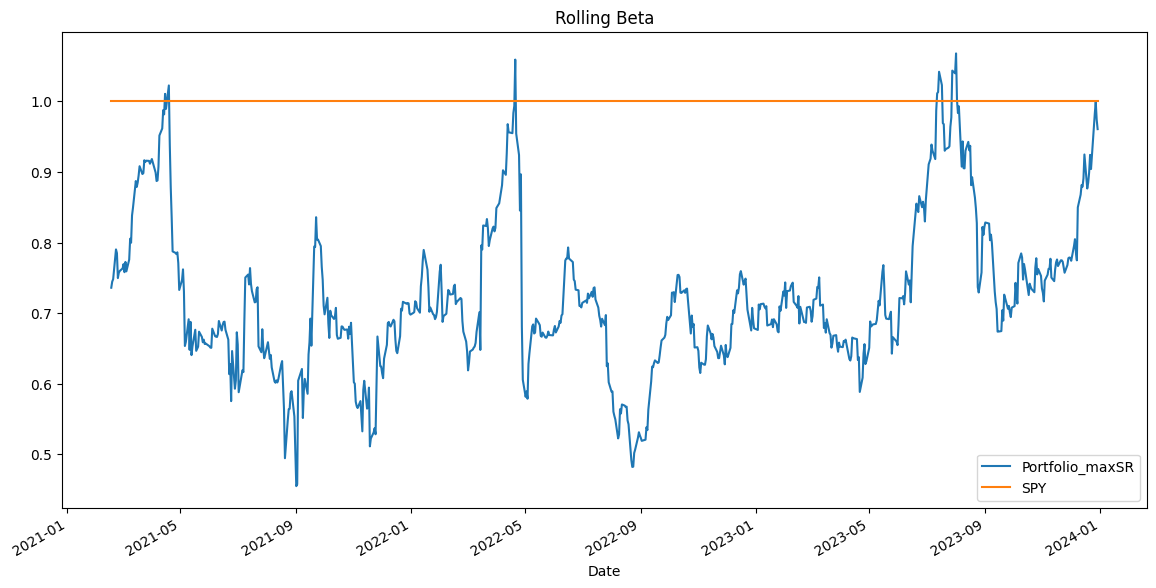

In [217]:
plt.figure(figsize=(14, 7))

plt.subplot()
rolling_betas_portfolio.plot(title='Rolling Beta', ax=plt.gca())
plt.legend(loc='lower right')


plt.show()

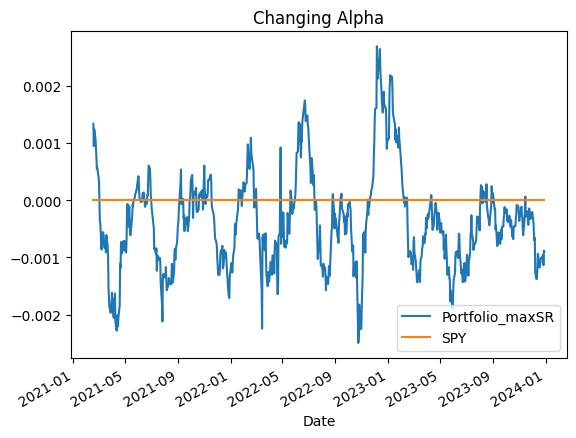

<Figure size 1400x700 with 0 Axes>

In [218]:

changing_alphas_portfolio.plot(title='Changing Alpha')
plt.legend(loc='lower right')

plt.subplot()
plt.figure(figsize=(14, 7))
plt.tight_layout()
plt.show()